## Example using the new API

In [1]:
import pandas as pd

from presc.dataset import Dataset
from presc.model import ClassificationModel
from presc.evaluations._example_misclass_rate import MisclassRateEvaluation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix

### Set up the dataset and classification model

These would be provided by the user.

#### Dataset

Load a sample dataset and apply preprocessing

In [2]:
df = pd.read_csv("../datasets/winequality.csv")
df = df.drop(columns=["quality"])

Wrap in a PRESC `Dataset` instance. This represents a dataset pre-split into train and test sets with API access to feature and label columns for each.

In [3]:
dd = Dataset(df, label="recommend")

Apply a train/test split to the dataset.

In [4]:
dd.split_test_train(0.3)

#### Classifier

Set up a classification model (scikit-learn Estimator) to predict `recommend`.

In [5]:
model = Pipeline([("scaler", StandardScaler()), ("clf", SVC(class_weight="balanced"))])

Create a PRESC `ClassificationModel` instance. This represents a "classification problem", including the available data and the classifier used for prediction. It precomputes and provides API access to test predictions and misclassifications.

The `ClassificationModel` assumes the underlying classifier is pretrained on the training portion of the `Dataset`, so that test predictions are available to work with (although some evaluations may involve retraining on different subsets of the data). If `should_train=True`, the classifier will be (re)trained on the training data as a part of setting up the instance.

In [6]:
cm = ClassificationModel(model, dd, should_train=True)

### Run a PRESC evaluation

Evaluations methods are implemented as subclasses of `BaseEvaluation`. These would be run as a part of generating the report.

`MisclassRateEvaluation` is a sample evaluation instance using the new API. It is a direct port of `misclass_rate` with the same functionality. This is only intended as an example and will be superceded by the conditional metrics evaluation.

Handling of config options is still TBD, but the plan is to set options at the instance level. Any parameters controlling the plotting or computations (eg. number of bins, which feature columns to include/exclude) would be set as config options.

From the user's point of view, all options for the entire report can be set in a central config file and shared with each evaluation.

In [7]:
mre = MisclassRateEvaluation(cm, config={"num_bins": 20})

In [8]:
mre._config

{'num_bins': 20, 'show_sd': False, 'width_fraction': 1.0}

Show the evaluation results.

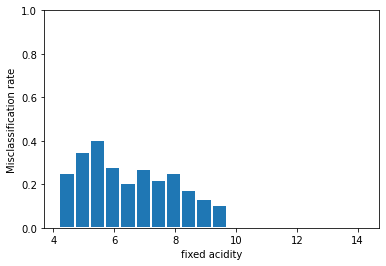

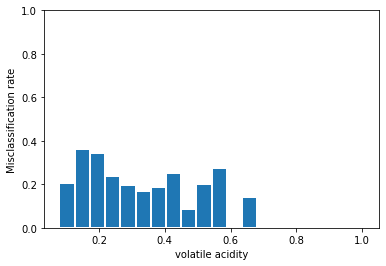

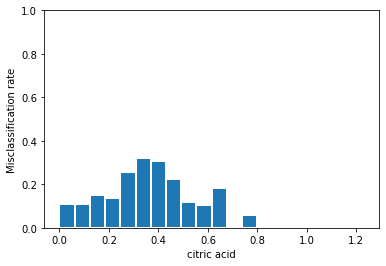

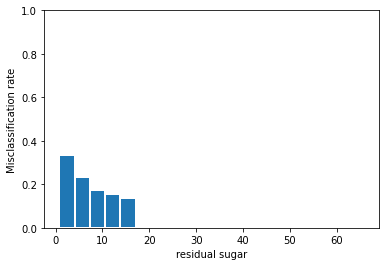

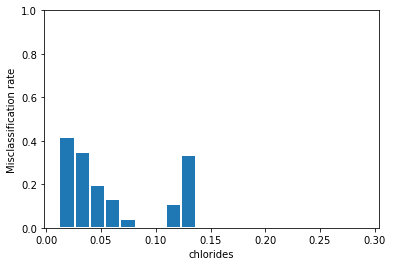

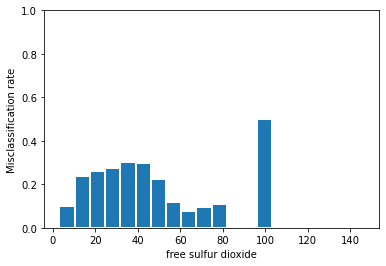

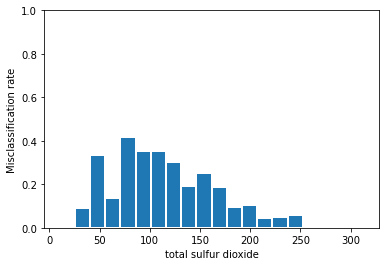

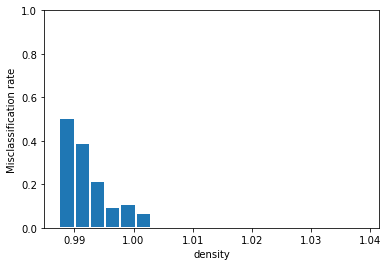

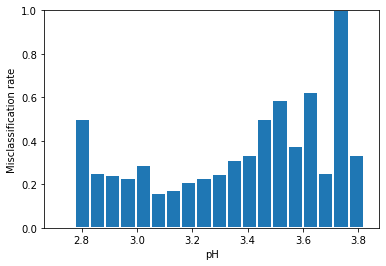

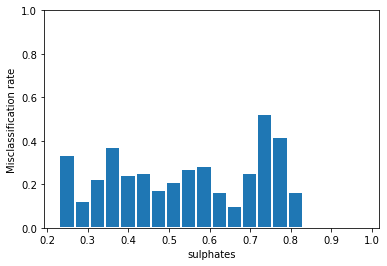

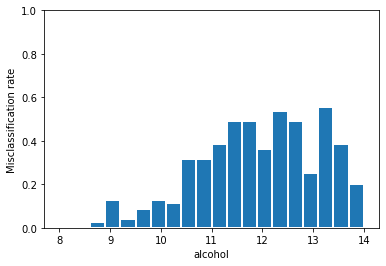

In [9]:
mre.display()

### Standard model evaluations

In [10]:
print(classification_report(cm.dataset.test_labels, cm.test_predictions))

              precision    recall  f1-score   support

       False       0.92      0.76      0.83      1157
        True       0.46      0.77      0.58       313

    accuracy                           0.76      1470
   macro avg       0.69      0.76      0.70      1470
weighted avg       0.83      0.76      0.78      1470



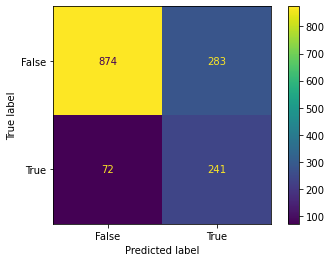

In [11]:
plot_confusion_matrix(cm.classifier, cm.dataset.test_features, cm.dataset.test_labels)